In [7]:
# %pip install ipympl
%matplotlib widget

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import Button
from matplotlib.animation import FuncAnimation
from agent import Agent
from grid import GridWorld as Environment


class Visualization:
    def __init__(self, environment, agent):
        self.environment = environment
        self.environment.reset()
        self.agent = agent
        self.fig, self.ax = plt.subplots()

        # Add button for next step
        self.ax_button = plt.axes([0.8, 0.01, 0.1, 0.075])
        self.button = Button(self.ax_button, "Next Step")
        self.button_connection_id = self.button.on_clicked(self.next_step)

        # Add button for reset
        self.ax_reset_button = plt.axes([0.65, 0.01, 0.1, 0.075])
        self.reset_button = Button(self.ax_reset_button, "Reset")
        self.reset_button.on_clicked(self.reset)

        # Add text box for cumulative reward
        self.ax_reward = plt.axes([0.01, 0.01, 0.2, 0.075])
        self.reward_text = self.ax_reward.text(
            0.5,
            0.5,
            f"Reward: {self.agent.total_reward}",
            horizontalalignment="center",
            verticalalignment="center",
            transform=self.ax_reward.transAxes,
            fontsize=12,
        )
        self.ax_reward.axis("off")

        # Add text box for max reward
        self.ax_max_reward = plt.axes([0.25, 0.01, 0.2, 0.075])
        self.max_reward_text = self.ax_max_reward.text(
            0.5,
            0.5,
            f"Max Reward: {self.environment.calculate_max_reward()}",
            horizontalalignment="center",
            verticalalignment="center",
            transform=self.ax_max_reward.transAxes,
            fontsize=12,
        )
        self.ax_max_reward.axis("off")

        self.update()

    def draw_grid(self):
        self.ax.clear()
        size = self.environment.size
        for x in range(size):
            for y in range(size):
                rect = patches.Rectangle(
                    (x, y), 1, 1, linewidth=1, edgecolor="black", facecolor="white"
                )
                self.ax.add_patch(rect)
        self.ax.set_xlim(0, size)
        self.ax.set_ylim(size, 0)  
        self.ax.set_aspect("equal")

        # Move x-axis labels to the top
        self.ax.xaxis.set_label_position("top")
        self.ax.xaxis.tick_top()

        # Draw target
        tx, ty = self.environment.B_position
        target_patch = patches.Rectangle(
            (tx, ty), 1, 1, linewidth=1, edgecolor="black", facecolor="green"
        )
        self.ax.add_patch(target_patch)

    def reset(self, event):
        self.environment.reset()
        self.agent.total_reward = 0
        self.max_reward_text.set_text(
            f"Max Reward: {self.environment.calculate_max_reward()}"
        )
        self.update()

    def update(self):
        self.draw_grid()

        # Draw agent
        ax, ay = self.agent.get_position()
        agent_color = "blue" if not self.agent.has_item() else "orange"
        agent_patch = patches.Circle((ax + 0.5, ay + 0.5), 0.3, color=agent_color)
        self.ax.add_patch(agent_patch)

        # Draw item
        if not self.agent.has_item():
            ix, iy = self.environment.item_position
            item_patch = patches.Circle((ix + 0.5, iy + 0.5), 0.2, color="red")
            self.ax.add_patch(item_patch)

        # Update reward text
        self.reward_text.set_text(f"Reward: {self.agent.total_reward}")

        # Check if the environment is terminal
        if self.environment.is_terminal():
            self.ax.text(
                0.5,
                0.5,
                "Complete",
                horizontalalignment="center",
                verticalalignment="center",
                transform=self.ax.transAxes,
                fontsize=20,
                color="red",
            )
            # self.button.disconnect(self.button_connection_id)
        self.fig.canvas.draw()

    def next_step(self, i):
        self.agent.move()
        self.update()

    def animate(self, i):
        if not self.environment.is_terminal():
            self.next_step(1)


In [9]:
env = Environment(size=5)
agent = Agent(env)
training_result=agent.train(3000)

Training complete
1.636479883309585e-72


We can see that the training happening with the loss going down after each training iteration

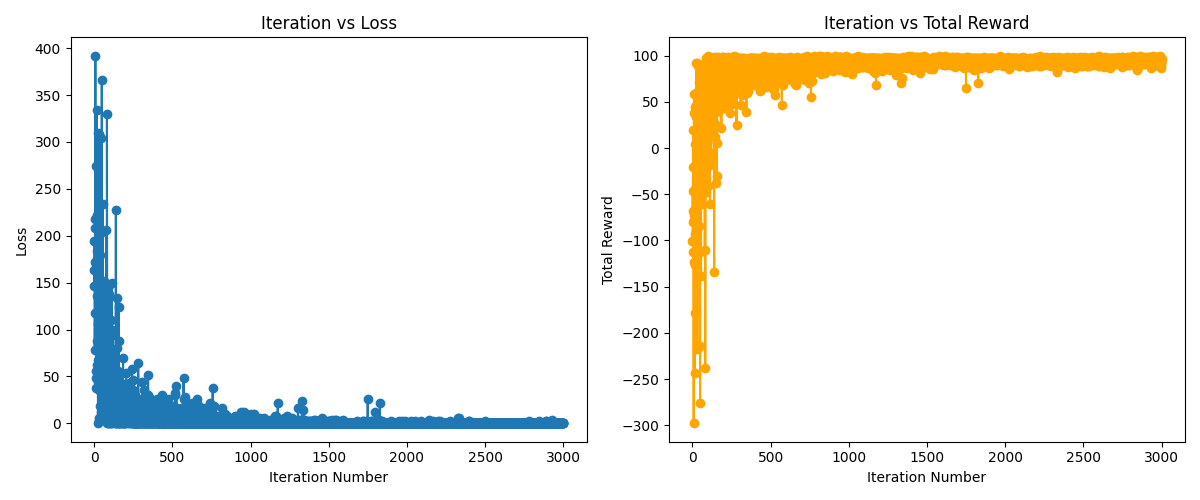

In [10]:
def plot_training(results):
    iterations = [t[0] for t in results]
    losses = [t[3] for t in results]
    total_rewards = [t[2] for t in results]

    # Create a figure with 1 row and 2 columns of subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting the loss in the first subplot
    ax1.plot(iterations, losses, marker="o", label="Loss")
    ax1.set_title("Iteration vs Loss")
    ax1.set_xlabel("Iteration Number")
    ax1.set_ylabel("Loss")

    # Plotting the total rewards in the second subplot
    ax2.plot(
        iterations, total_rewards, label="Total Reward", color="orange", marker="o"
    )
    ax2.set_title("Iteration vs Total Reward")
    ax2.set_xlabel("Iteration Number")
    ax2.set_ylabel("Total Reward")

    # Display the plots
    plt.tight_layout()
    plt.show()

plot_training(training_result)

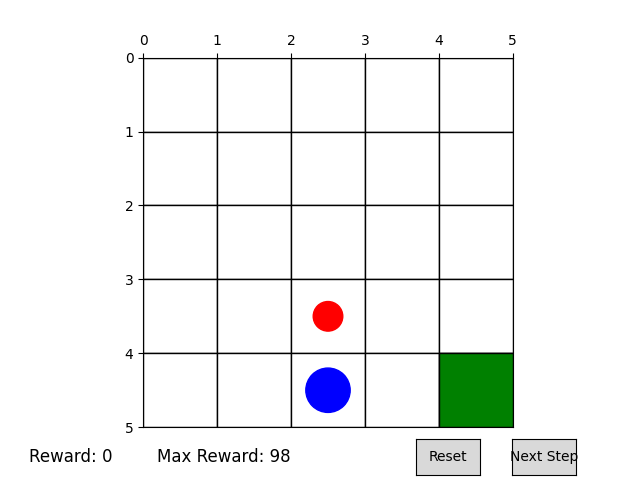

north
south
east
east
south
Action.WEST
Action.WEST
Action.WEST
south
south
east
east
east
east
east
north
south
east
south
east
east
south
south
Action.WEST
south
east
east
south
south
north
east
east
east
east
north
south
south
south


In [11]:
visualization = Visualization(env, agent)
# ani = FuncAnimation(visualization.fig, visualization.animate, frames=200, interval=400, repeat=False)
plt.show()

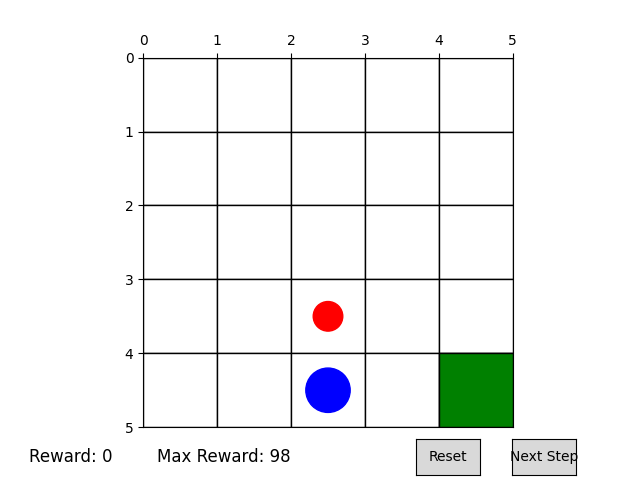

In [12]:
# env = Environment(size=5)
# agent = Agent(env)


ani = FuncAnimation(visualization.fig, visualization.animate, frames=200, interval=400, repeat=False)
plt.show()